# Iceland Tourism Segmentation 2023

Over the last decade, Iceland has expericned a rapid increase in international tourists, becoming one of the most desired destinations in Northern Europe. This growth has brought economic benefits but also challenges in managing visitors flows, infrastructure, and sustainable development. Despite the availability of general tourism statistics, detailed segmentation of tourists remains limited. Traditional profiling often overlooks behavioural or social-economic patterns that are essential for targeted marketing and service design. The goal of this project is to explore how unsupervised machine learning algorithms can help identify meaningful tourist segments based on three variables: **age**, **length of stay**, and **income**. The dataset used in this study was obtained from the Iceland Tourist Board (2023) and contains responses from airport surveys, summarised by nationality. To begin the exploration, an interactive map of Iceland was generated to provide a spatial context for the study.

In [3]:
import folium

In [4]:
m= folium.Map([64.9631, -19.0208], zoom_start= 6.5)

In [5]:
m

## Data Extraction and Preparation

The original dataset was obtained in the form of an Excel file containing multiple sheets. Each sheet represented different survey categories such as nationality, age, mean of transport, activities, and type of accommodation. As the relevant data was not stored in a single structured table, it was necessary to extract information from specific rows and columns within each sheet. To build the dataset, two sheets were selected. The values corresponding to each nationality were read and cleaned separately. Finally, the dataframes were merged by nationality as the common index. This process allowed for the creation of a single, structured datafram with 21 observations and 17 features.

In [8]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #Suppress the warnings

In [9]:
#Select excel file
file_path= '2023.xlsx'
#Read one sheet of excel file to get the nationalities and ages of tourists.
df_nationality= pd.read_excel(file_path, sheet_name= 'Profile', header= 0, usecols= [1,2,3,4,5,6], skiprows= 62, nrows=22)
#Define name of the columns
df_nationality.columns= ['Nationality', '< 24 years', '25-34 years', '35-44 years', '45-54 years', '> 55 years']

In [10]:
df_nationality.head()

Nationality  < 24 years  25-34 years  35-44 years  45-54 years  > 55 years
0         All    0.142150     0.339057     0.171023     0.153465    0.194304
1   Australia    0.110849     0.302141     0.103709     0.158044    0.325257
2     Austria    0.282675     0.321554     0.069455     0.240789    0.085527
3     Belgium    0.139197     0.369868     0.117891     0.192615    0.180429
4      Canada    0.129904     0.287536     0.149458     0.193538    0.239564

In [11]:
#Read the 'Profile' sheet of the excel to get the income of each nationality
df_income= pd.read_excel(file_path, sheet_name= 'Profile', header= 0, usecols= [1,2,3,4,5,6], skiprows= 121, nrows=22)
df_income.columns= ['Nationality', 'Low', 'Low average', 'Average', 'High average', 'High']

In [12]:
df_income.head()

Nationality       Low  Low average   Average  High average      High
0         All  0.025363     0.066323  0.382426      0.382264  0.143624
1   Australia  0.015865     0.053372  0.301044      0.445507  0.184212
2     Austria  0.027573     0.076623  0.347126      0.401308  0.147371
3     Belgium  0.005114     0.013144  0.361876      0.489186  0.130681
4      Canada  0.017651     0.077567  0.340626      0.418667  0.145489

In [13]:
#Read the 'Length of stay' sheet from excel
df_stay= pd.read_excel(file_path, sheet_name= 'Length of stay, accommodation', header= 0, usecols= [1,2,3,4,5,6,7,8], skiprows= 2, nrows=22)
df_stay.columns= ['Nationality', 'Did not stay overnight',	'1 night',	'2-3 nights',
                         '4-5 nights',	'6-8 nights',	'9-12 nights',	'>13 nights']

In [14]:
df_stay.head()

Nationality  Did not stay overnight   1 night  2-3 nights  4-5 nights  \
0         All                0.011247  0.018377    0.149210    0.234543   
1   Australia                0.000000  0.000000    0.092019    0.200428   
2     Austria                0.000000  0.006337    0.158199    0.153722   
3     Belgium                0.000000  0.004534    0.046357    0.117975   
4      Canada                0.030089  0.011997    0.157707    0.145329   

   6-8 nights  9-12 nights  >13 nights  
0    0.320000     0.173708    0.092915  
1    0.386516     0.191317    0.129719  
2    0.241868     0.311261    0.128613  
3    0.335201     0.184989    0.310945  
4    0.291163     0.255632    0.108083

In [15]:
#Merge 3 dataframe into one
df_final= pd.merge(df_nationality, df_stay, on='Nationality')
df_final= pd.merge(df_final, df_income, on='Nationality')

In [16]:
#See the merged dataframe 
df_final.head()

Nationality  < 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
0         All    0.142150     0.339057     0.171023     0.153465    0.194304   
1   Australia    0.110849     0.302141     0.103709     0.158044    0.325257   
2     Austria    0.282675     0.321554     0.069455     0.240789    0.085527   
3     Belgium    0.139197     0.369868     0.117891     0.192615    0.180429   
4      Canada    0.129904     0.287536     0.149458     0.193538    0.239564   

   Did not stay overnight   1 night  2-3 nights  4-5 nights  6-8 nights  \
0                0.011247  0.018377    0.149210    0.234543    0.320000   
1                0.000000  0.000000    0.092019    0.200428    0.386516   
2                0.000000  0.006337    0.158199    0.153722    0.241868   
3                0.000000  0.004534    0.046357    0.117975    0.335201   
4                0.030089  0.011997    0.157707    0.145329    0.291163   

   9-12 nights  >13 nights       Low  Low average   Average  High average  \
0     0.173708    0.092915  0.025363     0.066323  0.382426      0.382264   
1     0.191317    0.129719  0.015865     0.053372  0.301044      0.445507   
2     0.311261    0.128613  0.027573     0.076623  0.347126      0.401308   
3     0.184989    0.310945  0.005114     0.013144  0.361876      0.489186   
4     0.255632    0.108083  0.017651     0.077567  0.340626      0.418667   

       High  
0  0.143624  
1  0.184212  
2  0.147371  
3  0.130681  
4  0.145489

In [17]:
#Set Nationality as the new index
df_final= df_final.set_index('Nationality')

In [18]:
#Check the dataframe
df_final.head()

< 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
Nationality                                                                  
All            0.142150     0.339057     0.171023     0.153465    0.194304   
Australia      0.110849     0.302141     0.103709     0.158044    0.325257   
Austria        0.282675     0.321554     0.069455     0.240789    0.085527   
Belgium        0.139197     0.369868     0.117891     0.192615    0.180429   
Canada         0.129904     0.287536     0.149458     0.193538    0.239564   

             Did not stay overnight   1 night  2-3 nights  4-5 nights  \
Nationality                                                             
All                        0.011247  0.018377    0.149210    0.234543   
Australia                  0.000000  0.000000    0.092019    0.200428   
Austria                    0.000000  0.006337    0.158199    0.153722   
Belgium                    0.000000  0.004534    0.046357    0.117975   
Canada                     0.030089  0.011997    0.157707    0.145329   

             6-8 nights  9-12 nights  >13 nights       Low  Low average  \
Nationality                                                               
All            0.320000     0.173708    0.092915  0.025363     0.066323   
Australia      0.386516     0.191317    0.129719  0.015865     0.053372   
Austria        0.241868     0.311261    0.128613  0.027573     0.076623   
Belgium        0.335201     0.184989    0.310945  0.005114     0.013144   
Canada         0.291163     0.255632    0.108083  0.017651     0.077567   

              Average  High average      High  
Nationality                                    
All          0.382426      0.382264  0.143624  
Australia    0.301044      0.445507  0.184212  
Austria      0.347126      0.401308  0.147371  
Belgium      0.361876      0.489186  0.130681  
Canada       0.340626      0.418667  0.145489

In [19]:
#Drop the 'All' column
df_final= df_final.drop(['All'])

In [20]:
df_final.head()

< 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
Nationality                                                                  
Australia      0.110849     0.302141     0.103709     0.158044    0.325257   
Austria        0.282675     0.321554     0.069455     0.240789    0.085527   
Belgium        0.139197     0.369868     0.117891     0.192615    0.180429   
Canada         0.129904     0.287536     0.149458     0.193538    0.239564   
China          0.420936     0.339237     0.096019     0.057880    0.085928   

             Did not stay overnight   1 night  2-3 nights  4-5 nights  \
Nationality                                                             
Australia                  0.000000  0.000000    0.092019    0.200428   
Austria                    0.000000  0.006337    0.158199    0.153722   
Belgium                    0.000000  0.004534    0.046357    0.117975   
Canada                     0.030089  0.011997    0.157707    0.145329   
China                      0.000000  0.004825    0.107628    0.298742   

             6-8 nights  9-12 nights  >13 nights       Low  Low average  \
Nationality                                                               
Australia      0.386516     0.191317    0.129719  0.015865     0.053372   
Austria        0.241868     0.311261    0.128613  0.027573     0.076623   
Belgium        0.335201     0.184989    0.310945  0.005114     0.013144   
Canada         0.291163     0.255632    0.108083  0.017651     0.077567   
China          0.367947     0.153513    0.067344  0.003241     0.051416   

              Average  High average      High  
Nationality                                    
Australia    0.301044      0.445507  0.184212  
Austria      0.347126      0.401308  0.147371  
Belgium      0.361876      0.489186  0.130681  
Canada       0.340626      0.418667  0.145489  
China        0.471385      0.367208  0.106750

## Exploratory Data Analysis (EDA)

Once the dataset was structured and merged, EDA will be perform to better understand the distribution, structure, and relationships amongs the variables. First, I will check the shape of my final dataframe. Then I will inspect the data types and confirm that all values were properly loaded. After that, I will display the statistical table to check the statistical distribution of variables and check the distribution the variables have, besides the histogram of the varibles will be generate to visualise the distributions. I will also check if there are any missing values. To check the correlation between variables, a correlation heatmap will be created. Finally, interactive bar plots will be generate to visualise the top 5 ationalitites in each category. These dynamic visualisations will allow for easier exploration of which countries had the highest proportions of specific segments.

In [23]:
#Round the values of the dataframe to 2 digits 
df_final= df_final.round(2)
df_final.head()

< 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
Nationality                                                                  
Australia          0.11         0.30         0.10         0.16        0.33   
Austria            0.28         0.32         0.07         0.24        0.09   
Belgium            0.14         0.37         0.12         0.19        0.18   
Canada             0.13         0.29         0.15         0.19        0.24   
China              0.42         0.34         0.10         0.06        0.09   

             Did not stay overnight  1 night  2-3 nights  4-5 nights  \
Nationality                                                            
Australia                      0.00     0.00        0.09        0.20   
Austria                        0.00     0.01        0.16        0.15   
Belgium                        0.00     0.00        0.05        0.12   
Canada                         0.03     0.01        0.16        0.15   
China                          0.00     0.00        0.11        0.30   

             6-8 nights  9-12 nights  >13 nights   Low  Low average  Average  \
Nationality                                                                    
Australia          0.39         0.19        0.13  0.02         0.05     0.30   
Austria            0.24         0.31        0.13  0.03         0.08     0.35   
Belgium            0.34         0.18        0.31  0.01         0.01     0.36   
Canada             0.29         0.26        0.11  0.02         0.08     0.34   
China              0.37         0.15        0.07  0.00         0.05     0.47   

             High average  High  
Nationality                      
Australia            0.45  0.18  
Austria              0.40  0.15  
Belgium              0.49  0.13  
Canada               0.42  0.15  
China                0.37  0.11

In [24]:
#See how many observatiosn and columns the data has
df_final.shape

(21, 17)

In [25]:
#See the data type of each column
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Australia to USA
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   < 24 years              21 non-null     float64
 1   25-34 years             21 non-null     float64
 2   35-44 years             21 non-null     float64
 3   45-54 years             21 non-null     float64
 4   > 55 years              21 non-null     float64
 5   Did not stay overnight  21 non-null     float64
 6   1 night                 21 non-null     float64
 7   2-3 nights              21 non-null     float64
 8   4-5 nights              21 non-null     float64
 9   6-8 nights              21 non-null     float64
 10  9-12 nights             21 non-null     float64
 11  >13 nights              21 non-null     float64
 12  Low                     21 non-null     float64
 13  Low average             21 non-null     float64
 14  Average                 21 non-null     

In [26]:
#Check the statistical values of the dataframe
df_final.describe()

< 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
count   21.000000    21.000000    21.000000    21.000000   21.000000   
mean     0.151429     0.357619     0.159048     0.155238    0.177143   
std      0.078440     0.110721     0.048156     0.050361    0.086437   
min      0.060000     0.230000     0.070000     0.060000    0.030000   
25%      0.110000     0.280000     0.120000     0.120000    0.100000   
50%      0.130000     0.350000     0.160000     0.160000    0.190000   
75%      0.170000     0.380000     0.170000     0.190000    0.240000   
max      0.420000     0.690000     0.250000     0.240000    0.330000   

       Did not stay overnight    1 night  2-3 nights  4-5 nights  6-8 nights  \
count               21.000000  21.000000   21.000000   21.000000   21.000000   
mean                 0.005714   0.007143    0.132381    0.218095    0.332857   
std                  0.009258   0.009562    0.087058    0.122418    0.107198   
min                  0.000000   0.000000    0.030000    0.090000    0.130000   
25%                  0.000000   0.000000    0.060000    0.120000    0.290000   
50%                  0.000000   0.010000    0.140000    0.160000    0.350000   
75%                  0.010000   0.010000    0.160000    0.300000    0.390000   
max                  0.030000   0.040000    0.330000    0.550000    0.590000   

       9-12 nights  >13 nights        Low  Low average    Average  \
count    21.000000   21.000000  21.000000    21.000000  21.000000   
mean      0.188095    0.114286   0.032381     0.064286   0.385714   
std       0.100778    0.075071   0.027369     0.028385   0.061202   
min       0.060000    0.020000   0.000000     0.010000   0.290000   
25%       0.110000    0.060000   0.010000     0.050000   0.350000   
50%       0.180000    0.100000   0.020000     0.070000   0.360000   
75%       0.260000    0.130000   0.060000     0.080000   0.410000   
max       0.360000    0.310000   0.100000     0.130000   0.530000   

       High average       High  
count     21.000000  21.000000  
mean       0.387143   0.132857  
std        0.047449   0.029857  
min        0.290000   0.090000  
25%        0.360000   0.110000  
50%        0.390000   0.120000  
75%        0.410000   0.150000  
max        0.490000   0.180000

In [27]:
#Check if there are any missing values
df_final.isnull().sum()

< 24 years                0
25-34 years               0
35-44 years               0
45-54 years               0
> 55 years                0
Did not stay overnight    0
1 night                   0
2-3 nights                0
4-5 nights                0
6-8 nights                0
9-12 nights               0
>13 nights                0
Low                       0
Low average               0
Average                   0
High average              0
High                      0
dtype: int64

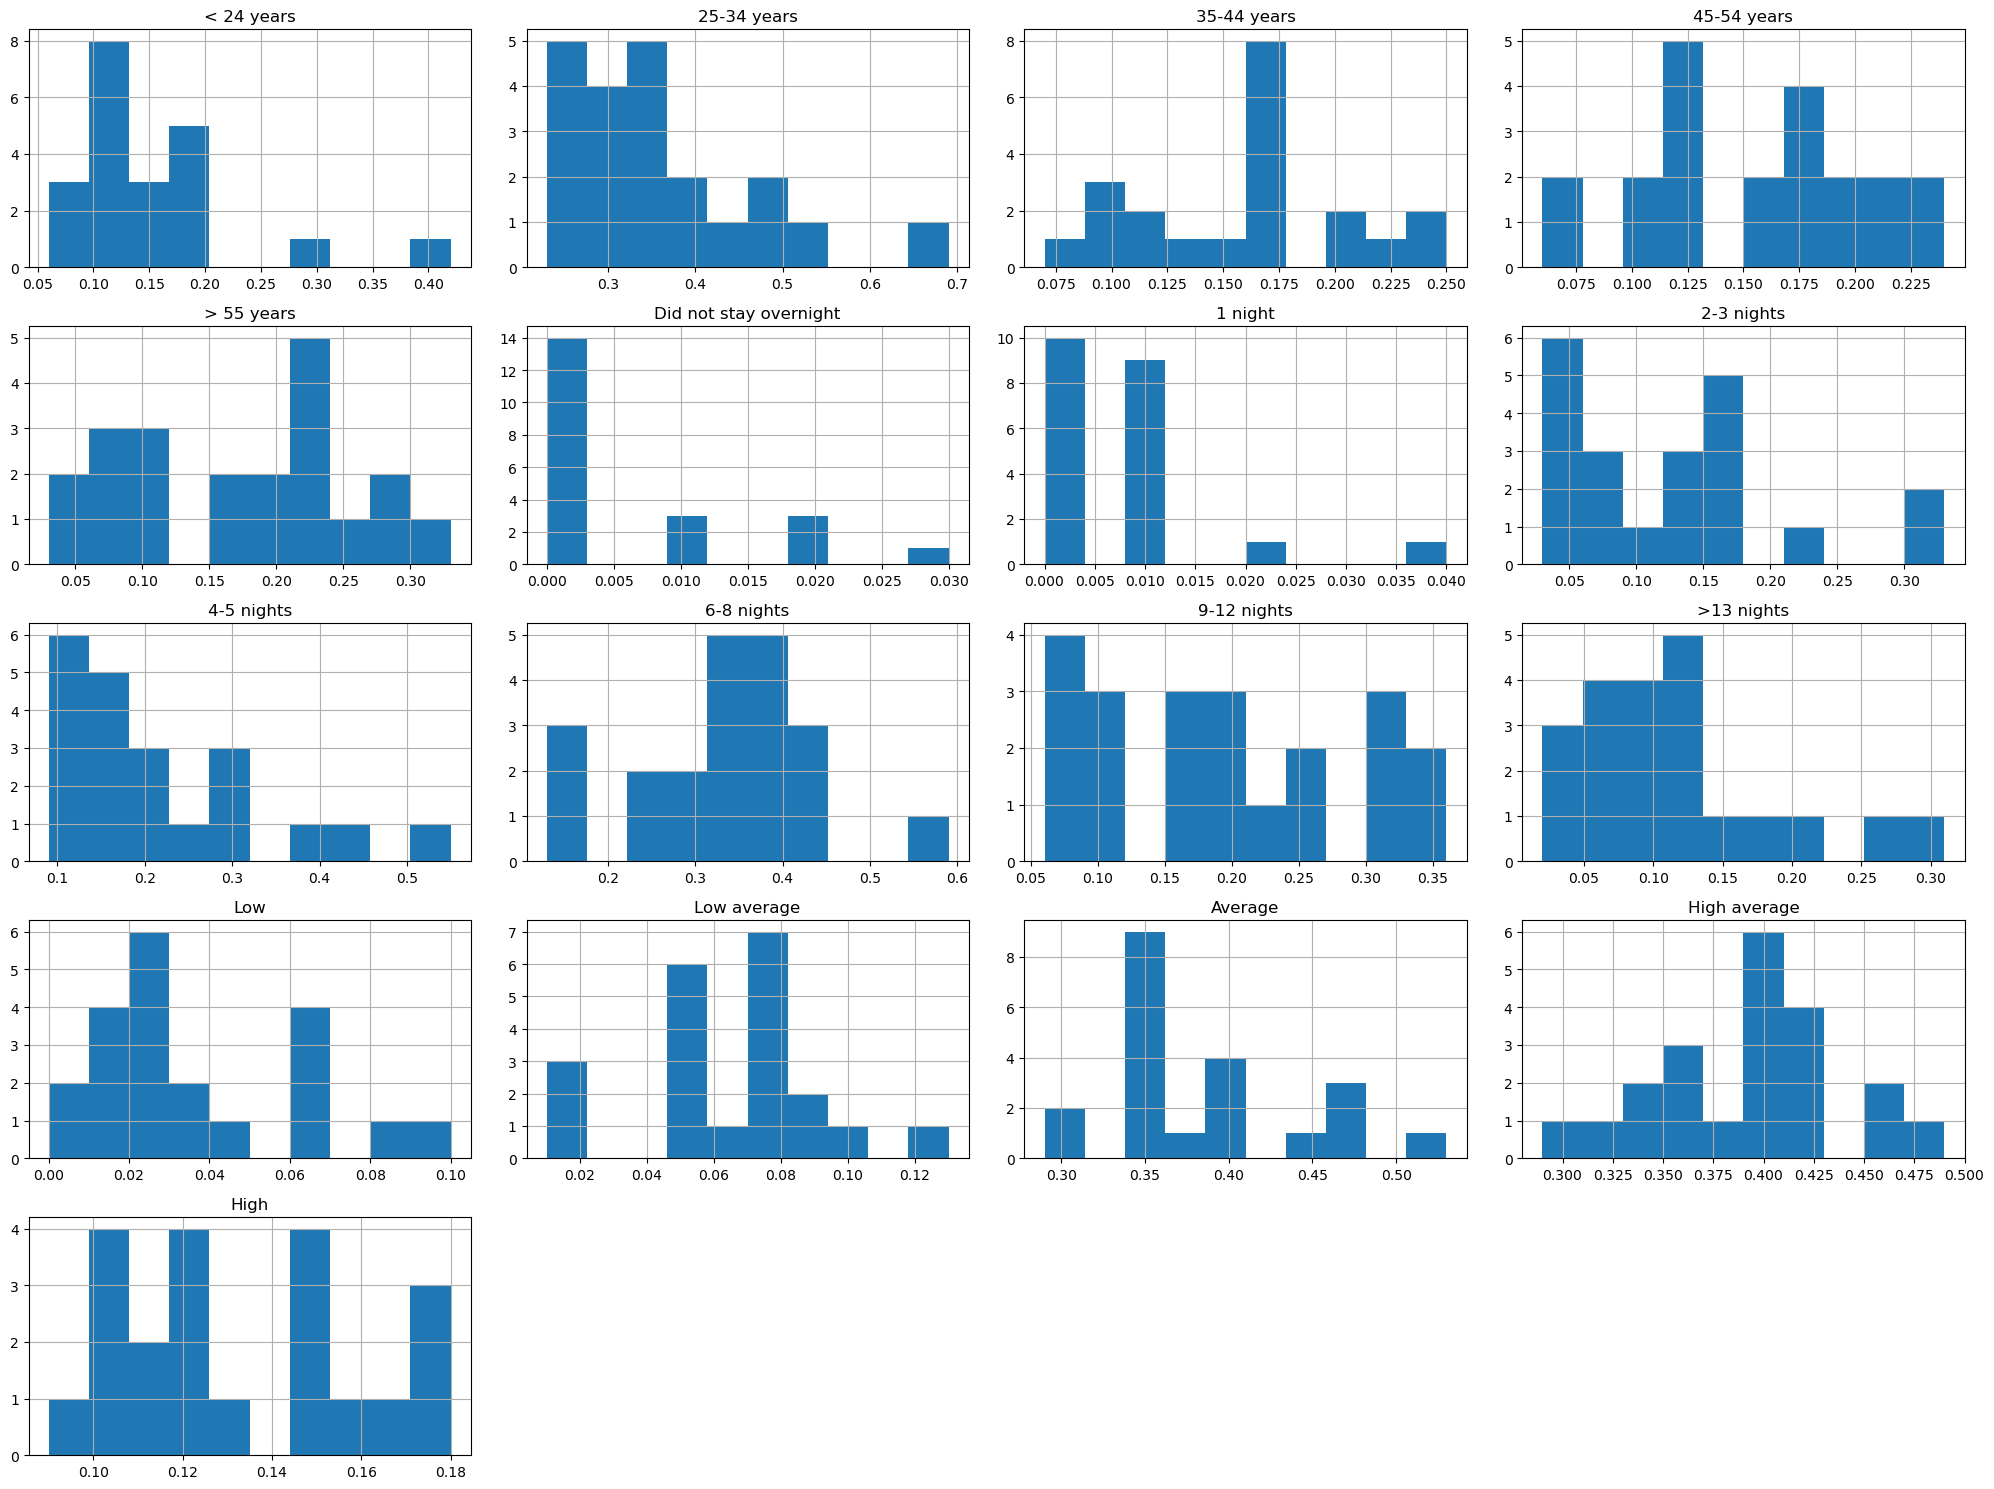

In [28]:
#Visualisation of the distribution of each column 
df_final.hist(bins=10, figsize=(20,15))
plt.tight_layout()
plt.show()

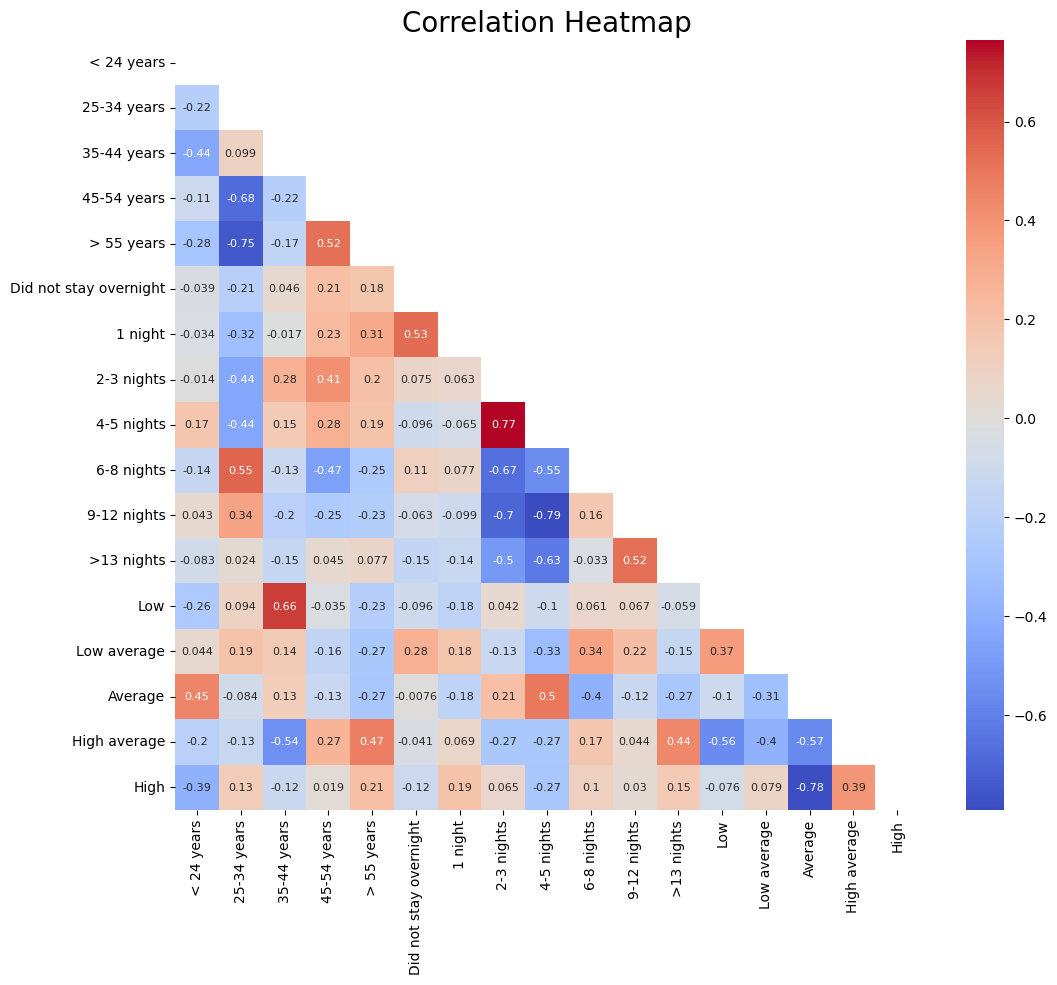

In [29]:
#Heatmap of the correlation between columns
mask = np.triu(np.ones_like(df_final.corr(), dtype=bool))
plt.figure(figsize=(12,10))
sns.heatmap(df_final.corr(), cmap='coolwarm', mask= mask, annot=True, annot_kws= {'size':'8'})
plt.title('Correlation Heatmap', fontsize=20)
plt.savefig('Heatmap_correlation.png', bbox_inches='tight')
plt.show()

In [30]:
#Import required libraries
import plotly.express as px
import panel as pn

In [31]:
#Visualisation of the top 5 nationalities by variable
pn.extension('plotly')
#Reset index
df_reset=  df_final.reset_index()
#Define age columns
age_columns= ['< 24 years', '25-34 years', '35-44 years', '45-54 years', '> 55 years']

age_selector= pn.widgets.Select(name= 'Age Group', options= age_columns)

@pn.depends(age_selector)
def plot_age(selected_age):
    top5_age= df_reset.sort_values(by=selected_age, ascending= False).head(5)
    fig= px.bar(top5_age, x= selected_age, y= 'Nationality', title= f'Top 5 Nationalities by Age Group: {selected_age}',
                labels= {selected_age: 'Proportion of Visitors'}, height= 500, color='Nationality')
    fig.update_layout(yaxis= {'categoryorder': 'total ascending'}, showlegend= False)
    return fig

pn.Column(pn.pane.Markdown('# Top 5 Nationalities by Age Group'), age_selector, plot_age)                                                                                                                        

Column
    [0] Markdown(str)
    [1] Select(name='Age Group', options=['< 24 years', ...], value='< 24 years')
    [2] ParamFunction(function, _pane=Plotly, defer_load=False)

In [32]:
stay_columns= ['Did not stay overnight', '1 night', '2-3 nights', '4-5 nights', '6-8 nights', '9-12 nights', '>13 nights']

stay_selector= pn.widgets.Select(name= 'Lenght of Stay', options= stay_columns)

@pn.depends(stay_selector)
def plot_stay(selected_stay):
    top5_stay= df_reset.sort_values(by=selected_stay, ascending= False).head(5)
    fig= px.bar(top5_stay, x= selected_stay, y= 'Nationality', title= f'Top 5 Nationalities by Length of Stay: {selected_stay}',
                labels= {selected_stay: 'Proportion of Visitors'}, height= 500, color= 'Nationality')
    fig.update_layout(yaxis= {'categoryorder': 'total ascending'})
    return fig

pn.Column(pn.pane.Markdown('# Top 5 Nationalities by Lenght of Stay'), stay_selector, plot_stay)  

Column
    [0] Markdown(str)
    [1] Select(name='Lenght of Stay', options=['Did not stay overnight',...], value='Did not stay overnight')
    [2] ParamFunction(function, _pane=Plotly, defer_load=False)

In [33]:
income_columns= ['Low', 'Low average', 'Average', 'High average', 'High']

income_selector= pn.widgets.Select(name= 'Income level', options= income_columns)

@pn.depends(income_selector)
def plot_income(selected_income):
    top5_income= df_reset.sort_values(by=selected_income, ascending= False).head(5)
    fig= px.bar(top5_income, x= selected_income, y= 'Nationality', title= f'Top 5 Nationalities by Income Level: {selected_income}',
                labels= {selected_income: 'Proportion of Visitors'}, height= 500, color= 'Nationality')
    fig.update_layout(yaxis= {'categoryorder': 'total ascending'})
    return fig

pn.Column(pn.pane.Markdown('# Top 5 Nationalities by Income Level'), income_selector, plot_income)  

Column
    [0] Markdown(str)
    [1] Select(name='Income level', options=['Low', 'Low average', ...], value='Low')
    [2] ParamFunction(function, _pane=Plotly, defer_load=False)

## Clustering Algorithms

In this section, three unsupervised machine learning algorithms will be applied to the dataset to identify potential tourist segments based on pattern in age, length of stay, and income level, the goal is to uncover hidden groupings or behavioural patterns amongs the top nationalities visiting Iceland in 2023. Before applying the models, a copy of the cleaned dataset will be created to procced with the clusterings without alreting the original data.

In [36]:
#Make a copy of the dataframe
df_clustering=df_final.copy()

In [37]:
df_clustering.head()

< 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
Nationality                                                                  
Australia          0.11         0.30         0.10         0.16        0.33   
Austria            0.28         0.32         0.07         0.24        0.09   
Belgium            0.14         0.37         0.12         0.19        0.18   
Canada             0.13         0.29         0.15         0.19        0.24   
China              0.42         0.34         0.10         0.06        0.09   

             Did not stay overnight  1 night  2-3 nights  4-5 nights  \
Nationality                                                            
Australia                      0.00     0.00        0.09        0.20   
Austria                        0.00     0.01        0.16        0.15   
Belgium                        0.00     0.00        0.05        0.12   
Canada                         0.03     0.01        0.16        0.15   
China                          0.00     0.00        0.11        0.30   

             6-8 nights  9-12 nights  >13 nights   Low  Low average  Average  \
Nationality                                                                    
Australia          0.39         0.19        0.13  0.02         0.05     0.30   
Austria            0.24         0.31        0.13  0.03         0.08     0.35   
Belgium            0.34         0.18        0.31  0.01         0.01     0.36   
Canada             0.29         0.26        0.11  0.02         0.08     0.34   
China              0.37         0.15        0.07  0.00         0.05     0.47   

             High average  High  
Nationality                      
Australia            0.45  0.18  
Austria              0.40  0.15  
Belgium              0.49  0.13  
Canada               0.42  0.15  
China                0.37  0.11

### Hierarchical Clustering

Agglomerative (Hierarchical) Clustering will be the first algorithm applied in this study. The main reason for starting with this method is to gain an initial understanding of how many potential clusters might exist within the dataset. This will help inform the number of clusters to later test in K-Means. To begin, a dendrogram will be visualised using Ward linkage method, which is known for producing compact and interpretable clusters (the complete and single method were also tested, but Ward was chosen based on both its performance and its recommendation in tourism segmentation literature (Dolnicar, 2018), where it is frequently cited as the most commonly used approach.) After visually inspect the dendrogram, I will apply the number os clusters suggested in the model. Then a new columns will be added to the dataset to show cluster assigment for each data point (nationality). To visualise the results, PCA will be used to reduce the dimensionality, (with two components, the cumulative explained variance was 67%, so I use three components because the variance was 77%). After PCA, the clusters will be plotted using a scatter plot. Finally, the cluster centroids will be calculated and plotted as a heatmap, to help to interpret how each segment differs in terms of age, length of stay, and income. 

In [40]:
#Set 'X' as the dataframe to apply it in the clustering
X= df_clustering

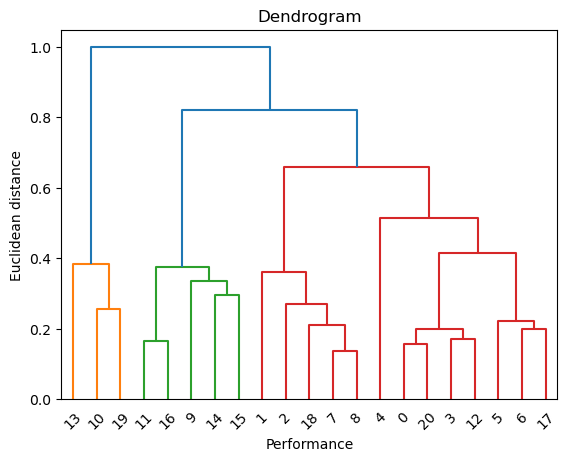

In [41]:
#Import the library for hierarchical clustering
import scipy.cluster.hierarchy as sch

# Call the method dendrogram by using an object sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))  #Use ward method 
plt.title('Dendrogram')
plt.xlabel('Performance')
plt.ylabel('Euclidean distance')
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering
# Create an object model using 3 clusters
Hierarchical = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')

# Train the model by calling fit() method
Hierarchical.fit(X)

AgglomerativeClustering(n_clusters=3)

In [43]:
# Add another column into the dataframe (df)
df_final['HR_labels'] = Hierarchical.labels_

# Display the dataframe records
df_final.head()

< 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
Nationality                                                                  
Australia          0.11         0.30         0.10         0.16        0.33   
Austria            0.28         0.32         0.07         0.24        0.09   
Belgium            0.14         0.37         0.12         0.19        0.18   
Canada             0.13         0.29         0.15         0.19        0.24   
China              0.42         0.34         0.10         0.06        0.09   

             Did not stay overnight  1 night  2-3 nights  4-5 nights  \
Nationality                                                            
Australia                      0.00     0.00        0.09        0.20   
Austria                        0.00     0.01        0.16        0.15   
Belgium                        0.00     0.00        0.05        0.12   
Canada                         0.03     0.01        0.16        0.15   
China                          0.00     0.00        0.11        0.30   

             6-8 nights  9-12 nights  >13 nights   Low  Low average  Average  \
Nationality                                                                    
Australia          0.39         0.19        0.13  0.02         0.05     0.30   
Austria            0.24         0.31        0.13  0.03         0.08     0.35   
Belgium            0.34         0.18        0.31  0.01         0.01     0.36   
Canada             0.29         0.26        0.11  0.02         0.08     0.34   
China              0.37         0.15        0.07  0.00         0.05     0.47   

             High average  High  HR_labels  
Nationality                                 
Australia            0.45  0.18          0  
Austria              0.40  0.15          0  
Belgium              0.49  0.13          0  
Canada               0.42  0.15          0  
China                0.37  0.11          0

In [44]:
#See how many points are on each cluster
df_final['HR_labels'].value_counts()

HR_labels
0    13
2     5
1     3
Name: count, dtype: int64

In [45]:
#Import PCA for dimension reduction to plot the clusters
from sklearn.decomposition import PCA
#Apply pca to reduce the dimension to 2 so it is easier to plot the clusters
pca_HR= PCA(n_components= 10)
X_pca_HR= pca_HR.fit_transform(X)
#Create the two features
df_final['PC1_HR']= X_pca_HR[:,0]
df_final['PC2_HR']= X_pca_HR[:,1]

In [46]:
total_var = pca_HR.explained_variance_ratio_.sum() * 100
total_var

99.2962756848519

In [47]:
#Apply pca to reduce the dimension to 3 so it is easier to plot the clusters
pca_HR= PCA(n_components= 3)
X_pca_HR= pca_HR.fit_transform(X)
#Create the two features
df_final['PC1_HR']= X_pca_HR[:,0]
df_final['PC2_HR']= X_pca_HR[:,1]
df_final['PC3_HR']= X_pca_HR[:,2]

In [48]:
total_var = pca_HR.explained_variance_ratio_.sum() * 100
total_var

76.61567724081738

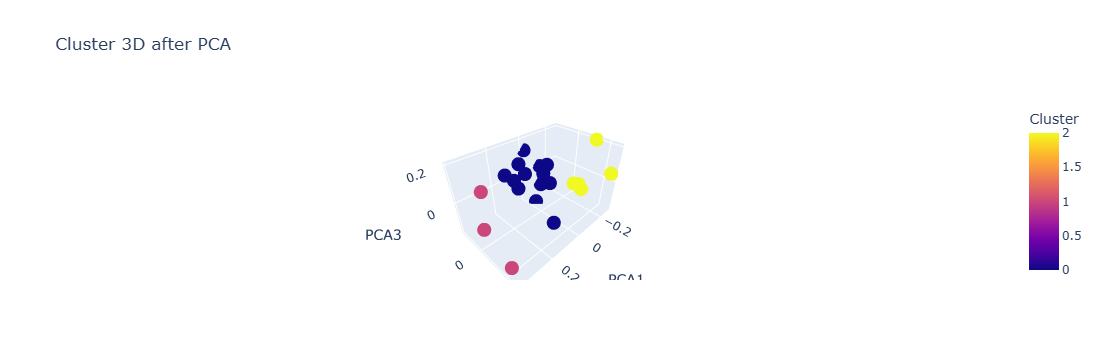

In [49]:
#3D scatterplot to visualise each cluster
df_pca_HR=pd.DataFrame(X_pca_HR, columns=['PCA1', 'PCA2', 'PCA3'], index= df_final.index)
df_pca_HR['Cluster']= df_final['HR_labels']
df_pca_HR['Nationality']= df_final.index

fig= px.scatter_3d(df_pca_HR, x='PCA1', y='PCA2', z='PCA3', color='Cluster', hover_name='Nationality', title= 'Cluster 3D after PCA')
fig.show()

In [50]:
#Define centroids of each cluster 
centroids_HR= X.columns
cluster_mean_HR= df_final.groupby('HR_labels')[centroids_HR].mean()

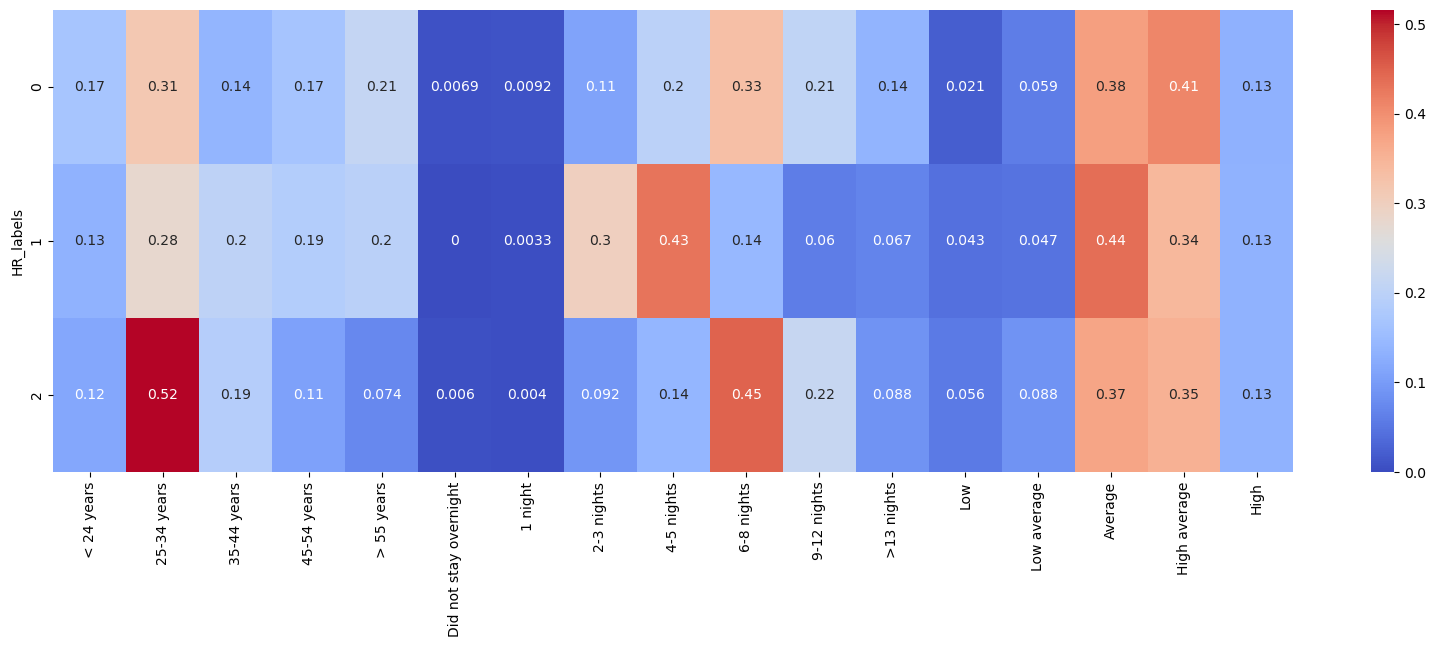

In [51]:
#Plot heatmap of clusters in hierarchical clustering
plt.figure(figsize=(20,6))
sns.heatmap(cluster_mean_HR, annot=True, cmap='coolwarm')
plt.show()

### K Means

After exploring the datset structure with hierarchical clustering, K-Means algortihm will be applied. To determine the most suitable number of clusters (k), two internal validation metrics will be used:: the Davies-Bouldin Index and the Silhouette Score. Both metrics will be calculated for different values od k, specifically in yhe range of 2 to 5 clusters. I selected this range for practical and methodological reasons. Given the small size of the data, using a limit number of clusters helps avoid oferfitting and ensures that each group has enough members to be meaningful. Additionally, segmenting tourists into that range, makes results more interpretable and actionable for tourism managers or business owners who may use this type of information to design targeted strategies.
Based on the evaluation of these scores, a final value for k will be selected and applied to K-Means. Then, a new column will be added to the dataset to record the cluster assigned to each nationality. To visualise the resulting segments, PCA will be used again. I already know that I need to use 3 components, so I will plot a 3D scatter plot. Finally, to interpret the characteristics of each cluster, the cluster centres will be calculated and visualise as a heatmap. 

In [54]:
from sklearn.cluster import KMeans
# Function to perform KMeans clustering and calculate metrics
def perform_clustering(n_clusters, X):
    KMeans_clustering = KMeans(n_clusters=n_clusters, random_state= 42)
    labels = KMeans_clustering.fit_predict(X)  #training of the data
    db_index = davies_bouldin_score(X, labels)  #david score
    silhouette_avg = silhouette_score(X, labels)  #silhouette score
    return db_index, silhouette_avg

In [55]:
#Import davied-boulding index and silhouette score 
from sklearn.metrics import davies_bouldin_score, silhouette_score
# Vary the number of clusters and store metrics
cluster_range = range(2, 5)  #Check optimal clusters from 2 to 5 clusters
db_scores = []
silhouette_scores = []

for n_clusters in cluster_range:
    db_index, silhouette_avg = perform_clustering(n_clusters, X)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

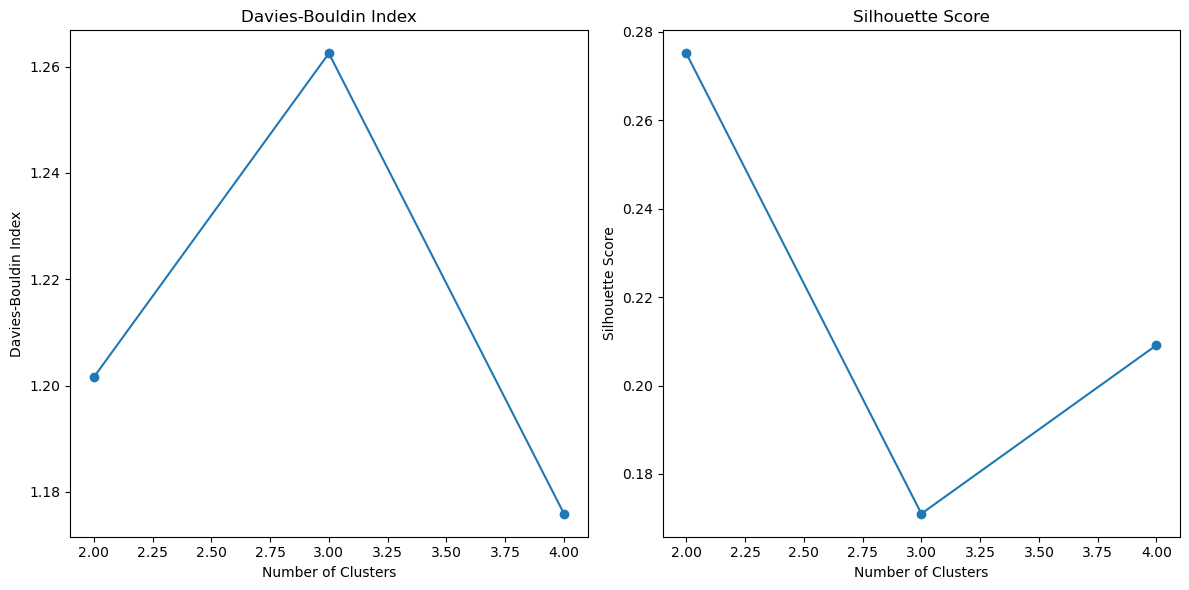

In [56]:
# Plot Davies-Bouldin method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

# Plot the Silhouette method
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.savefig('K-Means Clusters.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

In [57]:
# Initialise k_means by calling an object KMeans() using 4 clusters
k_means = KMeans(n_clusters = 4, random_state = 42)

# Train the model using fit() method
k_means.fit(X)

KMeans(n_clusters=4, random_state=42)

In [58]:
# Create an additional column in the dataframe (df) as KMeans_labels to see on which cluster belong each point of the data
df_final['KMeans_labels'] = k_means.labels_

# Display the dataframe records
df_final.head()

< 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
Nationality                                                                  
Australia          0.11         0.30         0.10         0.16        0.33   
Austria            0.28         0.32         0.07         0.24        0.09   
Belgium            0.14         0.37         0.12         0.19        0.18   
Canada             0.13         0.29         0.15         0.19        0.24   
China              0.42         0.34         0.10         0.06        0.09   

             Did not stay overnight  1 night  2-3 nights  4-5 nights  \
Nationality                                                            
Australia                      0.00     0.00        0.09        0.20   
Austria                        0.00     0.01        0.16        0.15   
Belgium                        0.00     0.00        0.05        0.12   
Canada                         0.03     0.01        0.16        0.15   
China                          0.00     0.00        0.11        0.30   

             6-8 nights  ...   Low  Low average  Average  High average  High  \
Nationality              ...                                                   
Australia          0.39  ...  0.02         0.05     0.30          0.45  0.18   
Austria            0.24  ...  0.03         0.08     0.35          0.40  0.15   
Belgium            0.34  ...  0.01         0.01     0.36          0.49  0.13   
Canada             0.29  ...  0.02         0.08     0.34          0.42  0.15   
China              0.37  ...  0.00         0.05     0.47          0.37  0.11   

             HR_labels    PC1_HR    PC2_HR    PC3_HR  KMeans_labels  
Nationality                                                          
Australia            0 -0.016969 -0.152703  0.135892              0  
Austria              0 -0.033501 -0.078385 -0.179171              0  
Belgium              0 -0.126347 -0.140654  0.001907              0  
Canada               0 -0.004618 -0.135594  0.000061              0  
China                0  0.049324  0.140129 -0.153682              2  

[5 rows x 22 columns]

In [59]:
#PCA for KMeans using 3 components (3 dimensions)
pca_KM = PCA(n_components= 3)
X_pca_KM = pca_KM.fit_transform(X)
#Create two new features
df_final['PC1']= X_pca_KM[:,0]
df_final['PC2']= X_pca_KM[:,1]
df_final['PC3']= X_pca_KM[:,2]

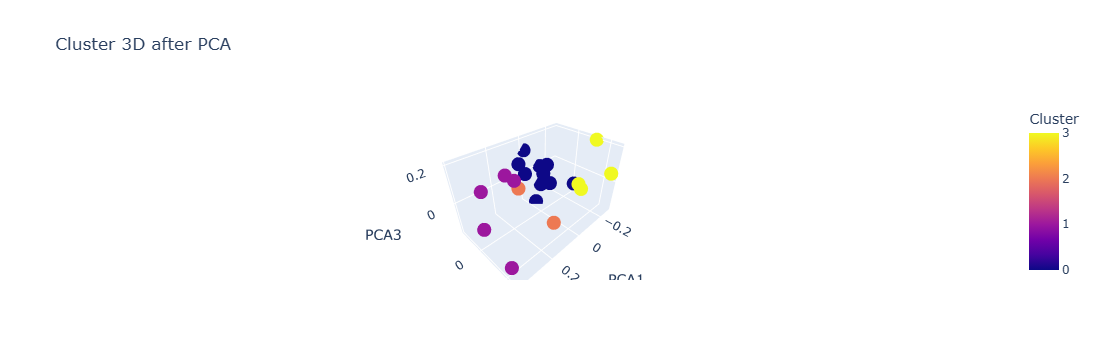

In [60]:
#plot 3d scatterplot to see each cluster
import plotly.express as px

df_pca=pd.DataFrame(X_pca_KM, columns=['PCA1', 'PCA2', 'PCA3'], index= df_final.index)
df_pca['Cluster']= df_final['KMeans_labels']
df_pca['Nationality']= df_final.index

fig= px.scatter_3d(df_pca, x='PCA1', y='PCA2', z='PCA3', color='Cluster', hover_name='Nationality', title= 'Cluster 3D after PCA')
fig.show()

In [ ]:
df_pca

In [62]:
#Display how many point are on each cluster
df_final['KMeans_labels'].value_counts()

KMeans_labels
0    10
1     5
3     4
2     2
Name: count, dtype: int64

In [63]:
#Print the cluster center values
print(k_means.cluster_centers_)

[[0.145  0.345  0.144  0.162  0.202  0.006  0.009  0.087  0.143  0.327
  0.264  0.161  0.028  0.061  0.366  0.409  0.14  ]
 [0.132  0.272  0.188  0.188  0.222  0.002  0.004  0.248  0.398  0.224
  0.066  0.058  0.04   0.052  0.41   0.374  0.124 ]
 [0.31   0.29   0.11   0.14   0.16   0.01   0.01   0.13   0.275  0.365
  0.13   0.085  0.01   0.055  0.465  0.365  0.105 ]
 [0.1125 0.53   0.185  0.105  0.0675 0.0075 0.005  0.1025 0.1525 0.4675
  0.18   0.0825 0.045  0.0925 0.365  0.36   0.14  ]]


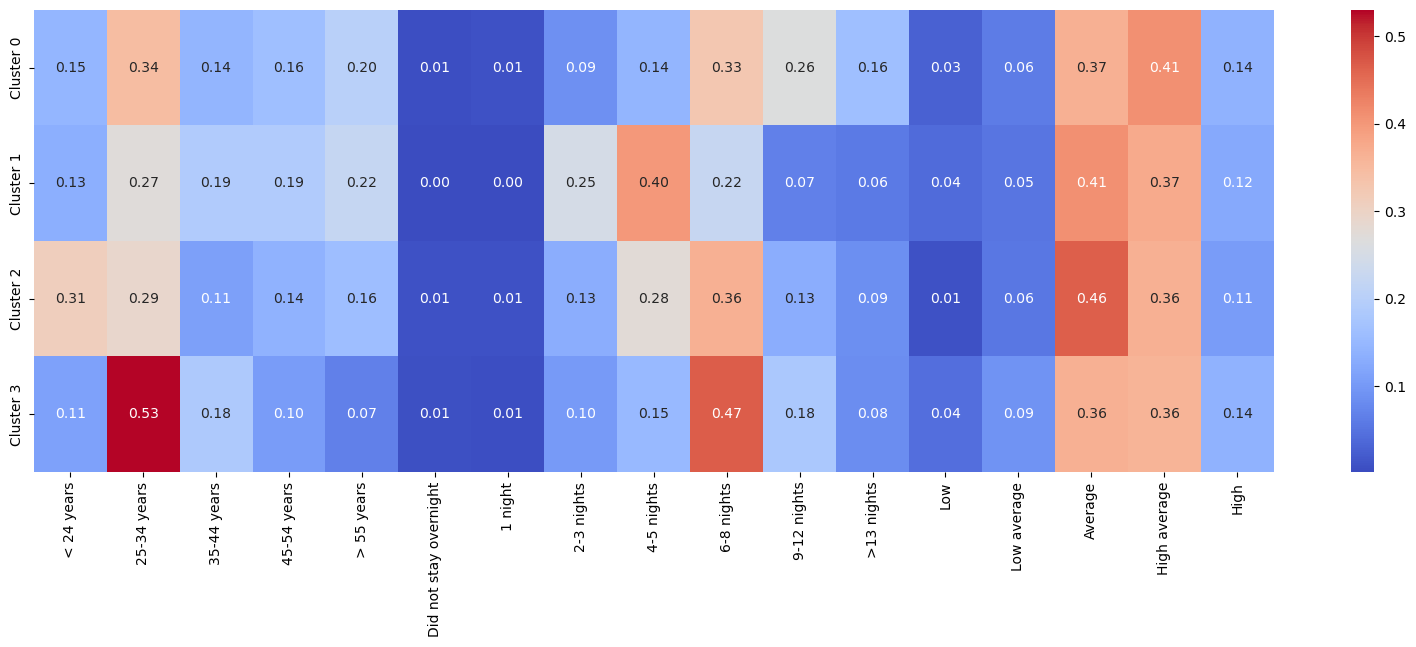

In [116]:
#Visualisation of the heatmap to understand the clusters
centroids= pd.DataFrame(k_means.cluster_centers_, columns= X.columns)
centroids.index= [f'Cluster {i}' for i in range(len(centroids))]

plt.figure(figsize=(20,6))
sns.heatmap(centroids, cmap='coolwarm', annot=True, fmt='.2f')
plt.savefig('Heatmap_Kmeans.png', bbox_inches='tight')
plt.show()

## DBSCAN

The third algorithm I will apply is the DBSCAN, which groups points based on density rather than distance. I will apply it at first with the default parameters to check how well it performances. If the performance is not good I will find the best parameters.

In [67]:
from sklearn.cluster import DBSCAN
# Create an object using dbscan
dbscan = DBSCAN()

# Train the model by calling fit() method
# We take epsilon is 0.5, and min_samples or minPoints is 5. Let’s visualize the results from this model
dbscan.fit(X)

DBSCAN()

In [68]:
# Add another column into the dataframe
df_final['DBSCAN_labels'] = dbscan.labels_ 

# Display the dataframe records
df_final.head()

< 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
Nationality                                                                  
Australia          0.11         0.30         0.10         0.16        0.33   
Austria            0.28         0.32         0.07         0.24        0.09   
Belgium            0.14         0.37         0.12         0.19        0.18   
Canada             0.13         0.29         0.15         0.19        0.24   
China              0.42         0.34         0.10         0.06        0.09   

             Did not stay overnight  1 night  2-3 nights  4-5 nights  \
Nationality                                                            
Australia                      0.00     0.00        0.09        0.20   
Austria                        0.00     0.01        0.16        0.15   
Belgium                        0.00     0.00        0.05        0.12   
Canada                         0.03     0.01        0.16        0.15   
China                          0.00     0.00        0.11        0.30   

             6-8 nights  ...  High  HR_labels    PC1_HR    PC2_HR    PC3_HR  \
Nationality              ...                                                  
Australia          0.39  ...  0.18          0 -0.016969 -0.152703  0.135892   
Austria            0.24  ...  0.15          0 -0.033501 -0.078385 -0.179171   
Belgium            0.34  ...  0.13          0 -0.126347 -0.140654  0.001907   
Canada             0.29  ...  0.15          0 -0.004618 -0.135594  0.000061   
China              0.37  ...  0.11          0  0.049324  0.140129 -0.153682   

             KMeans_labels       PC1       PC2       PC3  DBSCAN_labels  
Nationality                                                              
Australia                0 -0.016969 -0.152703  0.135892              0  
Austria                  0 -0.033501 -0.078385 -0.179171              0  
Belgium                  0 -0.126347 -0.140654  0.001907              0  
Canada                   0 -0.004618 -0.135594  0.000061              0  
China                    2  0.049324  0.140129 -0.153682              0  

[5 rows x 26 columns]

In [69]:
#Check how many clusters DBSCAN has created
df_final['DBSCAN_labels'].unique()

array([0], dtype=int64)

Due to, DBSCAN did not performance well with the default parameters because it generated just one cluster, I will look for the best parameters. To address this, a k-distance graph will be use to help estimate a suitable value for the opsilon (eps) parameter. This will be done using the Nearest Neighbors algorithm using two neighbors, this calculates the distance to each point's second closest neighbor. The results will be plotted.Then, a grid search will be manually performed by testing multiple combinations of epsilon and minimun samples values. For each configuration, the Silhouette Score will be computed to evaluate the clustering quality. The highest score will be the parameters use in the DBSCAN. After applying those parameters, a 3D scatter plot will be plotted to visualise the clusters and the heatmap to compare them.

In [71]:
from sklearn.neighbors import NearestNeighbors

# Initialise an object neigh by calling a method NearestNeighbors() with two neighbors
neigh = NearestNeighbors(n_neighbors = 2)

# Train the model by calling a method fit()
nbrs = neigh.fit(X)

# Store the distance and indices into distances and indices arrays
distances, indices = nbrs.kneighbors(X)

print(distances, indices)

[[1.49011612e-08 1.56843871e-01]
 [0.00000000e+00 2.48394847e-01]
 [2.10734243e-08 2.03715488e-01]
 [1.49011612e-08 1.72046505e-01]
 [0.00000000e+00 3.35111922e-01]
 [0.00000000e+00 2.02484567e-01]
 [1.49011612e-08 1.75783958e-01]
 [0.00000000e+00 1.37477271e-01]
 [1.49011612e-08 1.37477271e-01]
 [2.10734243e-08 3.07896086e-01]
 [0.00000000e+00 2.55147016e-01]
 [0.00000000e+00 1.64316767e-01]
 [0.00000000e+00 1.64924225e-01]
 [0.00000000e+00 2.62678511e-01]
 [0.00000000e+00 2.19544984e-01]
 [2.10734243e-08 2.96479342e-01]
 [0.00000000e+00 1.64316767e-01]
 [1.49011612e-08 1.99749844e-01]
 [0.00000000e+00 1.94164878e-01]
 [1.49011612e-08 2.55147016e-01]
 [0.00000000e+00 1.56843871e-01]] [[ 0 20]
 [ 1  3]
 [ 2  7]
 [ 3 12]
 [ 4  5]
 [ 5 20]
 [ 6 20]
 [ 7  8]
 [ 8  7]
 [ 9 15]
 [10 19]
 [11 16]
 [12  0]
 [13 19]
 [14 11]
 [15 14]
 [16 11]
 [17  6]
 [18  8]
 [19 10]
 [20  0]]


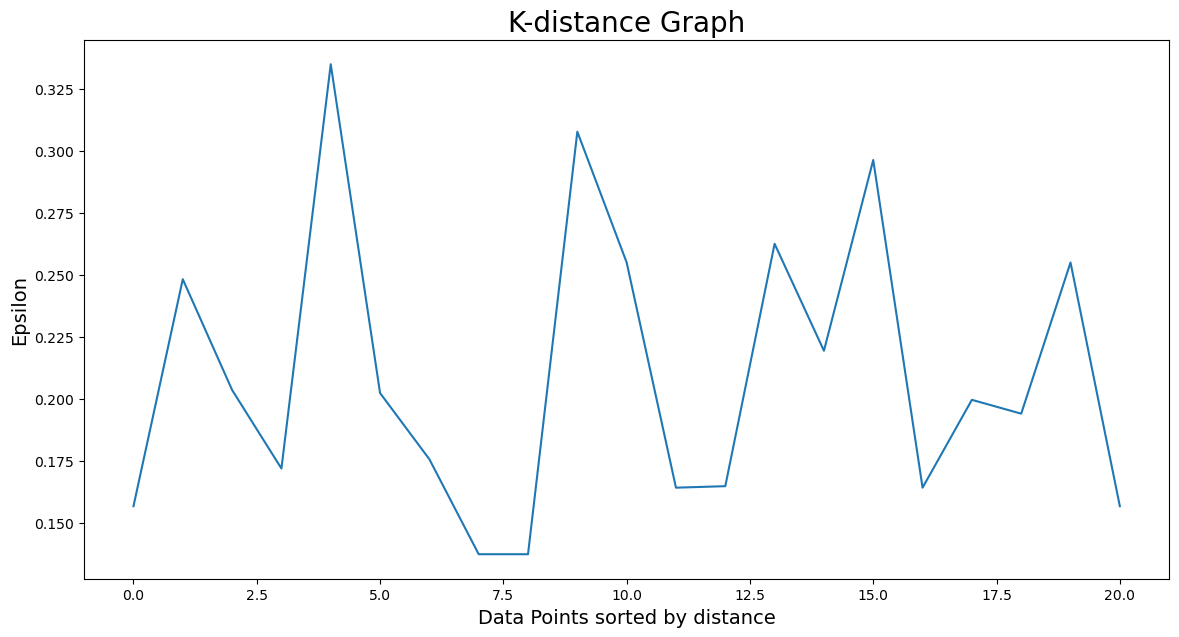

In [72]:
# Plotting K-distance Graph
distances = distances[:, 1]
plt.figure(figsize = (14, 7))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)
plt.show()

In [73]:
#Looking for the best parameters of eps and min_sample
db_param_options = [[0.25,2],[0.25,3],[0.25,4],[0.275,2],[0.275,3],[0.275,4],[0.3,2],[0.3,3],[0.3,4],[0.325,2],[0.325,3],[0.325,4]]
for ep,min_sample in db_param_options:
    # Generate clusters using DBSCAN
    db = DBSCAN(eps=ep, min_samples = min_sample)
    db_clusters = db.fit_predict(X)
    print("Eps: ", ep, "Min Samples: ", min_sample)
    print("DBSCAN Clustering: ", silhouette_score(X, db_clusters))

Eps:  0.25 Min Samples:  2
DBSCAN Clustering:  0.19710653073631143
Eps:  0.25 Min Samples:  3
DBSCAN Clustering:  0.19710653073631143
Eps:  0.25 Min Samples:  4
DBSCAN Clustering:  0.19710653073631143
Eps:  0.275 Min Samples:  2
DBSCAN Clustering:  0.19801074064286114
Eps:  0.275 Min Samples:  3
DBSCAN Clustering:  0.19801074064286114
Eps:  0.275 Min Samples:  4
DBSCAN Clustering:  0.19710653073631143
Eps:  0.3 Min Samples:  2
DBSCAN Clustering:  0.1491495024027247
Eps:  0.3 Min Samples:  3
DBSCAN Clustering:  0.1491495024027247
Eps:  0.3 Min Samples:  4
DBSCAN Clustering:  0.22723518318776176
Eps:  0.325 Min Samples:  2
DBSCAN Clustering:  0.11555639758943977
Eps:  0.325 Min Samples:  3
DBSCAN Clustering:  0.11555639758943977
Eps:  0.325 Min Samples:  4
DBSCAN Clustering:  0.11555639758943977


In [74]:
# Generate clusters using DBSCAN using the best parameter
dbscan_opt = DBSCAN(eps = 0.3, min_samples = 4)
db_clusters = dbscan_opt.fit_predict(X)

In [75]:
# Add another column into the dataframe
df_final['DBSCAN_opt_labels'] = dbscan_opt.labels_

# Display the counts by labels
df_final['DBSCAN_opt_labels'].value_counts()

DBSCAN_opt_labels
 0    17
-1     4
Name: count, dtype: int64

In [76]:
#Apply pca to reduce the dimension to 3 so it is easier to plot the clusters
pca_DB= PCA(n_components= 3)
X_pca_DB= pca_DB.fit_transform(X)
#Create the two features
df_final['PC1_HR']= X_pca_DB[:,0]
df_final['PC2_HR']= X_pca_DB[:,1]
df_final['PC3_HR']= X_pca_DB[:,2]

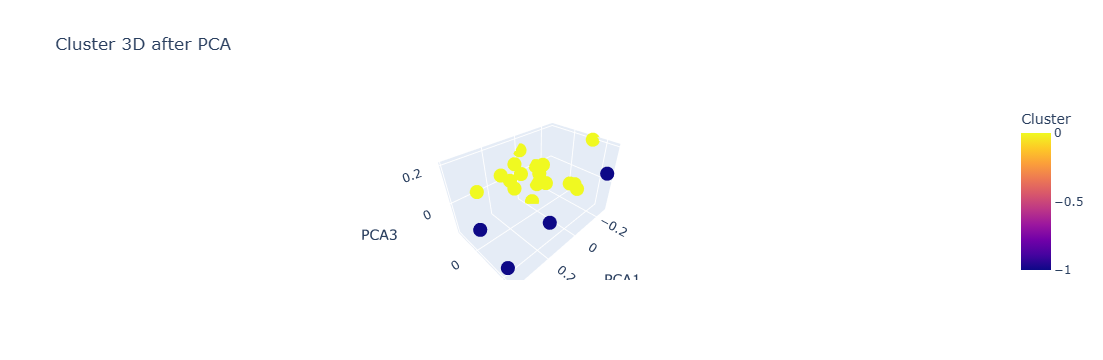

In [77]:
#3D scatter plot to visualise each cluster in DBSCAN
df_pca_DB=pd.DataFrame(X_pca_DB, columns=['PCA1', 'PCA2', 'PCA3'], index= df_final.index)
df_pca_DB['Cluster']= df_final['DBSCAN_opt_labels']
df_pca_DB['Nationality']= df_final.index

fig= px.scatter_3d(df_pca_DB, x='PCA1', y='PCA2', z='PCA3', color='Cluster', hover_name='Nationality', title= 'Cluster 3D after PCA')
fig.show()

In [78]:
#Define centroids of each cluster generated by DBSCAN
centroids_DB= X.columns
cluster_mean_DB= df_final.groupby('DBSCAN_opt_labels')[centroids_DB].mean()

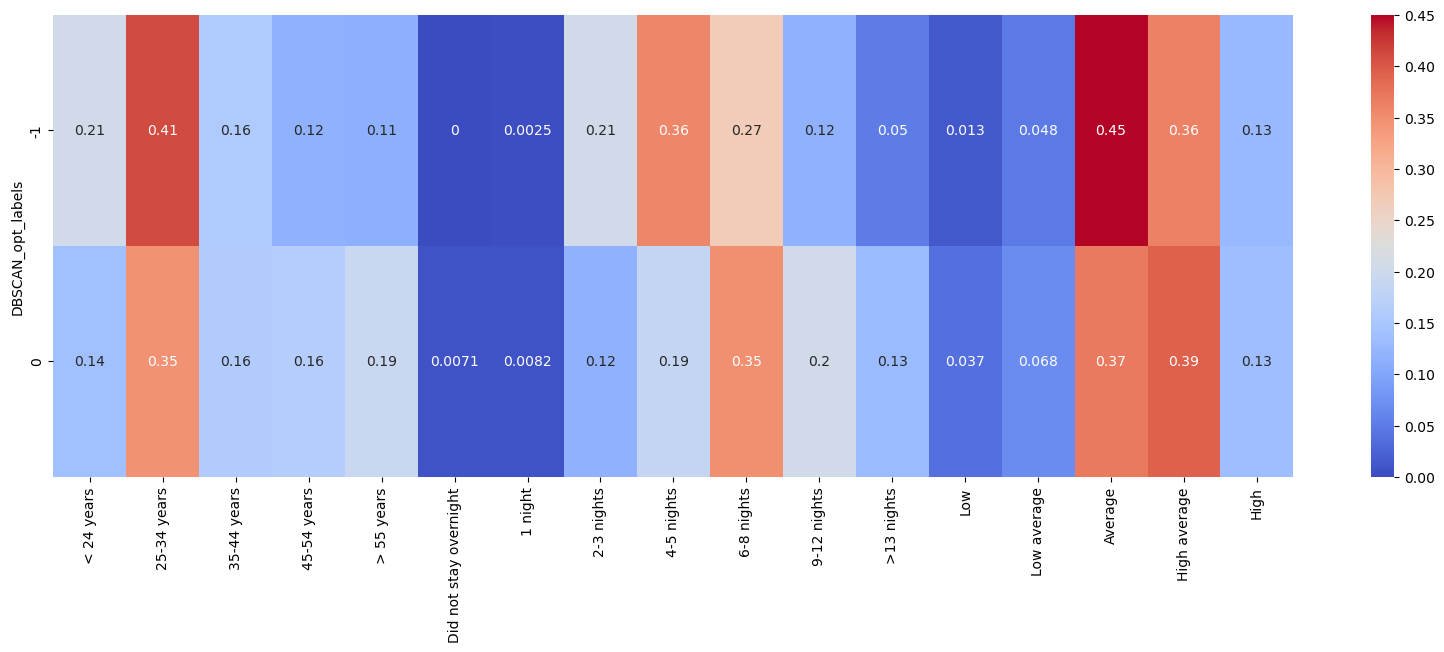

In [79]:
#Heatmap of clusters in DBSCAN
plt.figure(figsize=(20,6))
sns.heatmap(cluster_mean_DB, annot=True, cmap='coolwarm')
plt.show()

## ANOVA test

To evaluate wether the clusters generated by the K-Means and Hierarchical algorithms are statistically meaninful, a one-way ANOVA test will be conducted. The purpose of the test is to determine wether the mean values of each variable differ significantly across the identified clusters. This step supports the validation of the clustering results and directly tests the research hypothesis. I will use a significance level (alpha) of 0.05, which is a widely accepted threshold in the fields of social sciences, tourism, and applied data analysis If the p-value is less than 0.05, it is concluded that there is a statistically significant difference between at least two clusters for the analyse variable. If the p-value os greater than 0.05, no significant difference is observed. Due to DBSCAN' poor performance and low interpretability (with one cluster labelled as noise), the ANOVA test will not be applied on this algorithm.

In [82]:
from scipy.stats import f_oneway

### K-Means Results

In [84]:
#Define the variables  used in the clustering to apply ANOVA testing
variables= ['< 24 years','25-34 years','35-44 years','45-54 years','> 55 years',
            'Did not stay overnight','1 night','2-3 nights','4-5 nights','6-8 nights','9-12 nights','>13 nights',
            'Low','Low average','Average','High average','High']

for var in variables:
    groups= [df_final[df_final['KMeans_labels'] ==i][var] for i in sorted(df_final['KMeans_labels'].unique())]

    F,p= f_oneway(*groups)

    print(f'Variable: {var}')
    print(f'F-statistic: {F:.4f}')
    print(f'P-value: {p:.4f}')

    if p<0.05:
        print('There is a significant difference at least between two clusters\n')
    else:
        print('There is no significant difference between clusters\n')

Variable: < 24 years
F-statistic: 5.1605
P-value: 0.0102
There is a significant difference at least between two clusters

Variable: 25-34 years
F-statistic: 11.9357
P-value: 0.0002
There is a significant difference at least between two clusters

Variable: 35-44 years
F-statistic: 2.4402
P-value: 0.0997
There is no significant difference between clusters

Variable: 45-54 years
F-statistic: 2.7036
P-value: 0.0780
There is no significant difference between clusters

Variable: > 55 years
F-statistic: 4.3524
P-value: 0.0190
There is a significant difference at least between two clusters

Variable: Did not stay overnight
F-statistic: 0.4238
P-value: 0.7384
There is no significant difference between clusters

Variable: 1 night
F-statistic: 0.3929
P-value: 0.7597
There is no significant difference between clusters

Variable: 2-3 nights
F-statistic: 8.5158
P-value: 0.0011
There is a significant difference at least between two clusters

Variable: 4-5 nights
F-statistic: 23.7104
P-value: 0.0000
T

## Hierarchical Results

In [86]:
for var in variables:
    groups= [df_final[df_final['HR_labels'] ==i][var] for i in sorted(df_final['HR_labels'].unique())]

    F,p= f_oneway(*groups)

    print(f'Variable: {var}')
    print(f'F-statistic: {F:.4f}')
    print(f'P-value: {p:.4f}')

    if p<0.05:
        print('There is a significant difference at least between two clusters\n')
    else:
        print('There is no significant difference between clusters\n')

Variable: < 24 years
F-statistic: 0.9169
P-value: 0.4176
There is no significant difference between clusters

Variable: 25-34 years
F-statistic: 19.4202
P-value: 0.0000
There is a significant difference at least between two clusters

Variable: 35-44 years
F-statistic: 4.7414
P-value: 0.0222
There is a significant difference at least between two clusters

Variable: 45-54 years
F-statistic: 4.0230
P-value: 0.0360
There is a significant difference at least between two clusters

Variable: > 55 years
F-statistic: 8.0198
P-value: 0.0032
There is a significant difference at least between two clusters

Variable: Did not stay overnight
F-statistic: 0.6614
P-value: 0.5282
There is no significant difference between clusters

Variable: 1 night
F-statistic: 0.8019
P-value: 0.4639
There is no significant difference between clusters

Variable: 2-3 nights
F-statistic: 17.1485
P-value: 0.0001
There is a significant difference at least between two clusters

Variable: 4-5 nights
F-statistic: 11.7673
P-va

## Stability Criterion ARI

In addition to the ANOVA test, the Adjusted Rand Index (ARI) will be applied as an additional method to assess the quality and reliability of the clustering solutions. ARI measures the similarity between different clustering runs by comparing how consistently data points are grouped. A higher ARI scores indicates more stable and reproducible clusters. To apply this method, multiple runs of each algortihm will be executed with different random states for K-Means, and different samples of the data for Hierarchical. The ARI will be then calculates between each pair of runs, and the average score will be use as a measure of clustering stability.

In [89]:
from sklearn.metrics import adjusted_rand_score

In [90]:
#Set the number of clustering repetitions
n_runs= 5
#Empty list to store cluster labels for each run
labels_list= []
#repeat k-means with different random states
for seed in range(n_runs):
    km= KMeans(n_clusters= 4, random_state=seed)
    labels= km.fit_predict(X)
    labels_list.append(labels)

ari_scores= []
for i in range(n_runs):
    for j in range (i+1, n_runs):
        ari= adjusted_rand_score(labels_list[i], labels_list[j])
        ari_scores.append(ari)

mean_ari= np.mean(ari_scores)
print(f'Mean ARI across runds: {mean_ari:.3f}')

Mean ARI across runds: 0.611


In [91]:
from sklearn.utils import resample
#Set the number of clustering repetitions
r_runs=5
ari_scores= []
labels_list=[]
#repeat hierarchical with different sample
for i in range(n_runs):
    X_sample= resample(X, n_samples=len(X), random_state= i)
    model= AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
    labels= model.fit_predict(X_sample)
    labels_list.append(labels)

ari_scores= []
for i in range(n_runs):
    for j in range (i+1, n_runs):
        if len(labels_list[i]) == len(labels_list[j]):
            ari= adjusted_rand_score(labels_list[i], labels_list[j])
            ari_scores.append(ari)

mean_ari= np.mean(ari_scores)
print(f'Mean ARI across runds: {mean_ari:.3f}')

Mean ARI across runds: 0.011


## Results and Visualisation

After evaluating all models, K-Means clustering was selected as the final segmentation method due to its balance between statistical validation, cluster stability, and practical interpretability. While the heatmap of cluster centroids provides a detailed overview of how variables differ across groups, it may not be easily understood by non-technical audiences. Therefore, to enhance accessibility and practical value, a series of interactive bar charts will be created. This visualisations allow business owners or tourism managers to explore the most relevant charaxteristics of each tourist segment more intuitively.

In [94]:
df_final.columns

Index(['< 24 years', '25-34 years', '35-44 years', '45-54 years', '> 55 years',
       'Did not stay overnight', '1 night', '2-3 nights', '4-5 nights',
       '6-8 nights', '9-12 nights', '>13 nights', 'Low', 'Low average',
       'Average', 'High average', 'High', 'HR_labels', 'PC1_HR', 'PC2_HR',
       'PC3_HR', 'KMeans_labels', 'PC1', 'PC2', 'PC3', 'DBSCAN_labels',
       'DBSCAN_opt_labels'],
      dtype='object')

In [95]:
cluster_summary= df_final.copy()

summary= cluster_summary.groupby('KMeans_labels').mean()[['< 24 years','25-34 years','35-44 years','45-54 years','> 55 years',
            'Did not stay overnight','1 night','2-3 nights','4-5 nights','6-8 nights','9-12 nights','>13 nights',
            'Low','Low average','Average','High average','High']]

In [192]:
summary_simplified= pd.DataFrame({'KMeans_labels': summary.index, 
                                  '25-34 years visitors(%)': summary['25-34 years'] *100,
                                  'Average Stay (6-8 nights)': summary['6-8 nights'] *100,
                                  'High Average Income(%)': summary['High average'] *100})

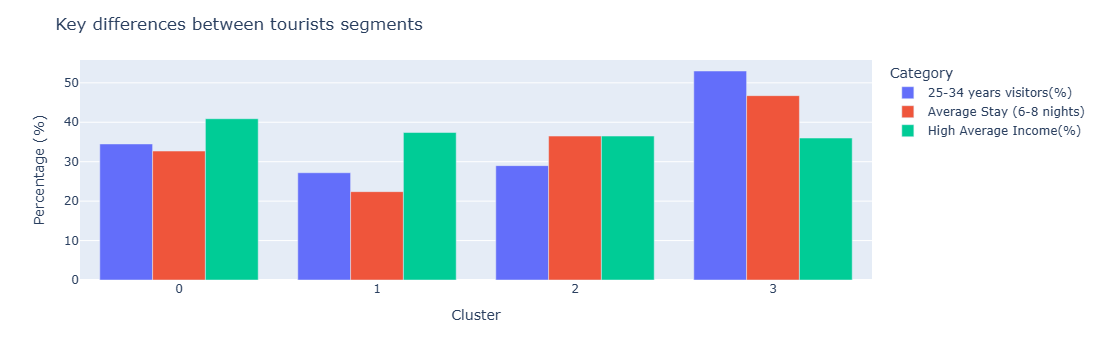

In [194]:
summary_melted= summary_simplified.melt(id_vars= 'KMeans_labels', var_name= 'Category', value_name= 'Percentage')

fig= px.bar(summary_melted, x='KMeans_labels', y='Percentage', color= 'Category', barmode='group', height=500)
fig.update_layout(title=dict(text= 'Key differences between tourists segments'), xaxis=dict(title=dict( text='Cluster')),yaxis=dict( title=dict(text='Percentage (%)')))
fig.show()

In [196]:
summary_simplified= pd.DataFrame({'KMeans_labels': summary.index, 
                                  '< 24 visitors(%)': summary['< 24 years'] *100,
                                  'Average Stay (6-8 nights)': summary['6-8 nights'] *100,
                                  'Average Income(%)': summary['Average'] *100})

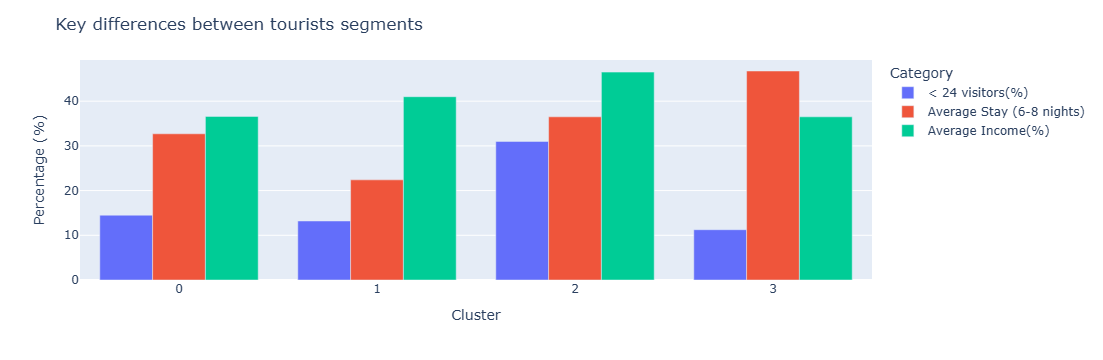

In [198]:
summary_melted= summary_simplified.melt(id_vars= 'KMeans_labels', var_name= 'Category', value_name= 'Percentage')

fig= px.bar(summary_melted, x='KMeans_labels', y='Percentage', color= 'Category', barmode='group', height=500)
fig.update_layout(title=dict(text= 'Key differences between tourists segments'), xaxis=dict(title=dict( text='Cluster')),yaxis=dict( title=dict(text='Percentage (%)')))
fig.show()

---